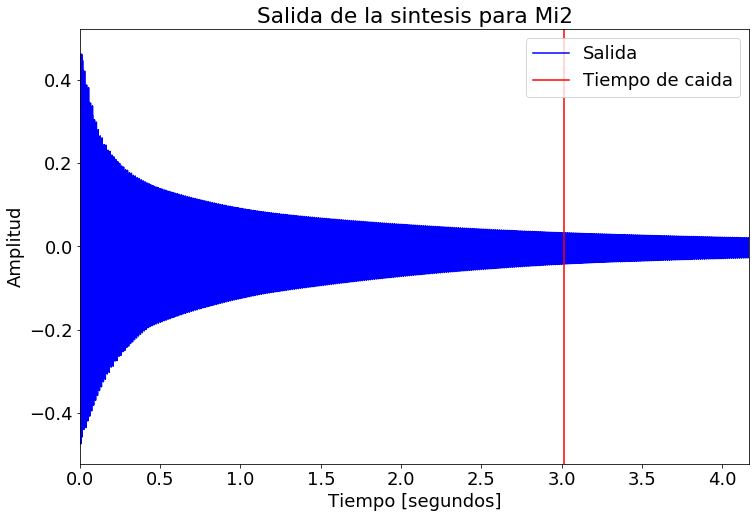

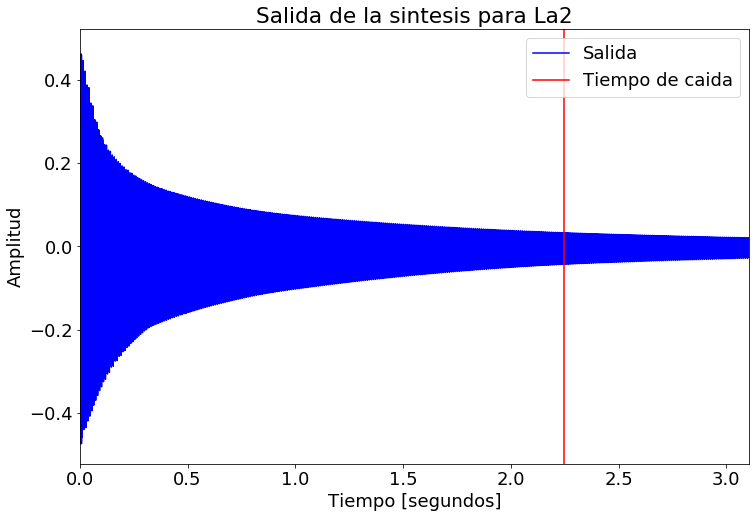

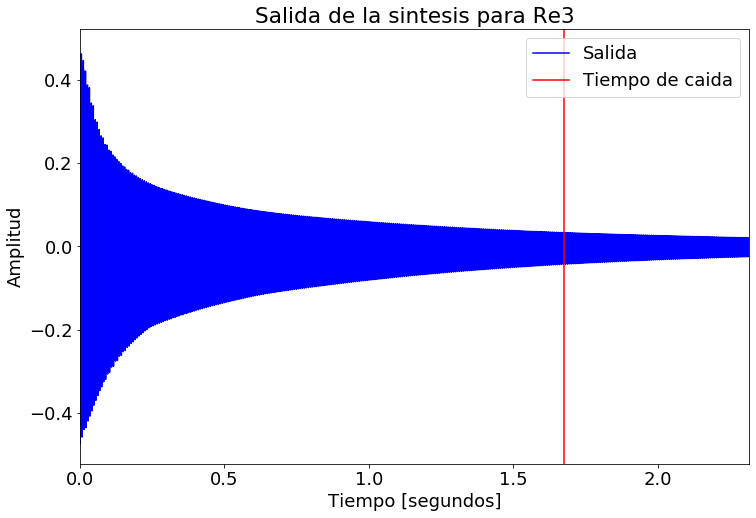

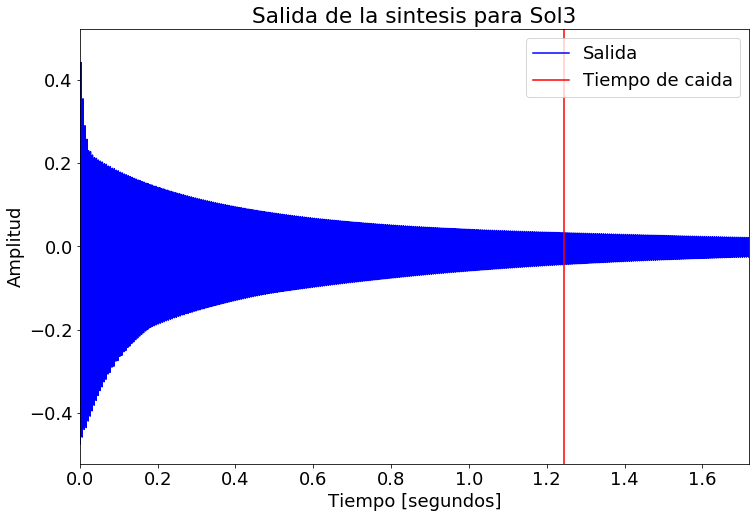

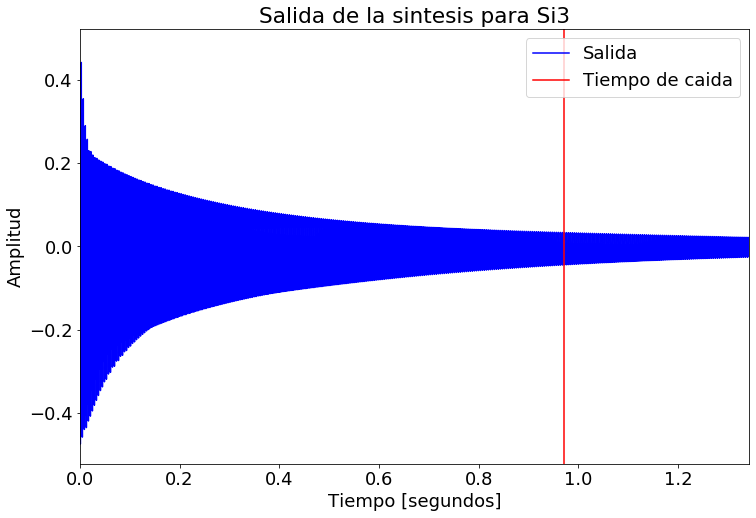

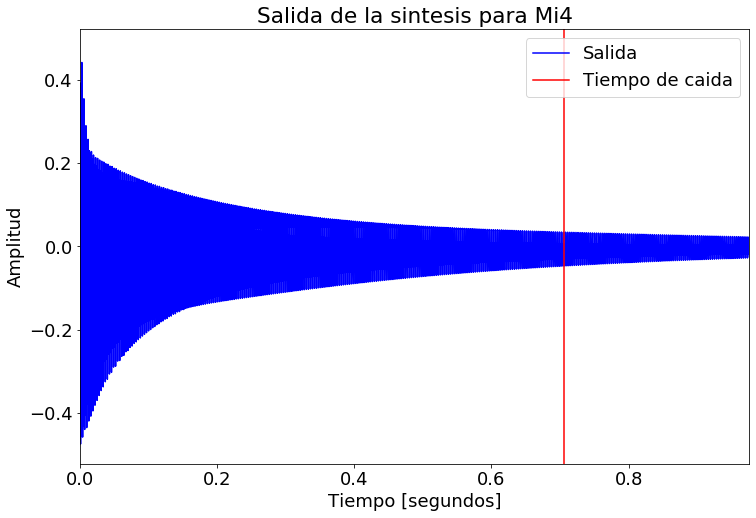

In [13]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 18})

def plot_wav(x, fs, N, title):
    # Variables para graficar
    ymax = np.max(abs(x))

    # Tiempo de caida teorico
    decay_time_teo = -(N + .5)/(fs * np.log(amp*np.cos(2*np.pi/(2*N+1))))
    
    t = np.arange(x.size) / fs
    plt.plot(t, x, color='blue', label='Salida')
    plt.axvline(decay_time_teo, 0, 1, label='Tiempo de caida', color='red')
    plt.xlabel('Tiempo [segundos]')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.xlim([t[0], t[-1]/5])
    plt.ylim([-ymax*1.1, ymax*1.1])
    plt.legend(loc='upper right')

    
    
# Parametros de las sintesis
lens = [535, 400, 300, 225, 178, 133]
nota = ['Mi2', 'La2', 'Re3', 'Sol3', 'Si3', 'Mi4']
amp = 0.996

i = 0
for i in range(len(lens)):
    # Manejo del archivo
    filename = f'nota{i+1}.wav'
    x, fs = librosa.load(filename, sr=44100)
    
    # Longitud del buffer usado para esta nota
    N = lens[i]
    
    plot_wav(x, fs, N, f'Salida de la sintesis para {nota[i]}')
    plt.savefig(f'{nota[i]}')
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=fs))
    

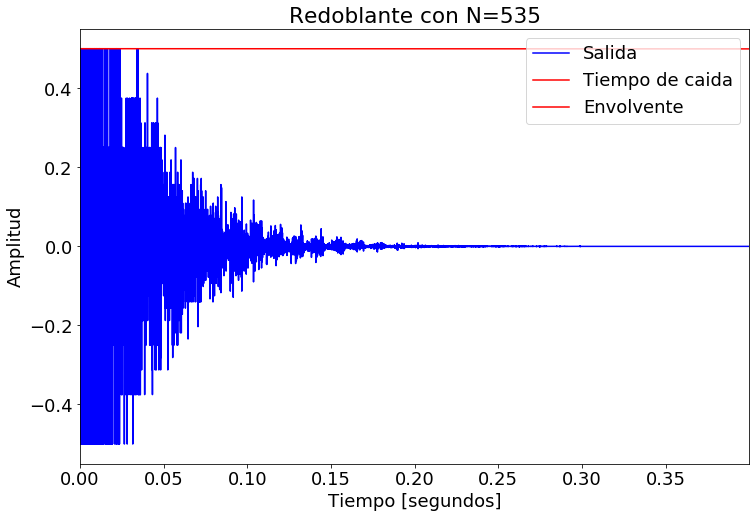

In [24]:
filename = 'blend_0_5.wav'
x, fs = librosa.load(filename, sr=44100)
plot_wav(x, fs, 535, f'Redoblante con N=535')
plt.savefig('redoblante')
t = np.arange(x.size)
y = 0.5*np.power(2, -t/(2*N+1))
plt.plot(t,y, label='Envolvente', color='r')
plt.legend(loc='upper right')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))